# About Dataset

## Heart Disease Dataset
DOI : 10.24432/C52P4X
This dataset is licensed under a Creative Commons Attribution 4.0 International (CC BY 4.0) license.


## Attribute Information
### Only 14 attributes used:
**age** : age of patient

**sex** : male or female

**(cp) chest pain type (4 values)** : 

- Value 0: typical angina
- Value 1: atypical angina
- Value 2: non-anginal pain
- Value 3: asymptomatic

**(trestbps) resting blood pressure** : 

- Normal: Systolic blood pressure less than 120 mmHg and diastolic blood pressure less than 80 mmHg.
- Prehypertension: Systolic blood pressure 120-139 mmHg or diastolic blood pressure 80-89 mmHg.
- Stage 1 hypertension: Systolic blood pressure 140-159 mmHg or diastolic blood pressure 90-99 mmHg.
- Stage 2 hypertension: Systolic blood pressure 160 mmHg or higher or diastolic blood pressure 100 mmHg or higher.

**(chol) serum cholestoral in mg/dl** :

Serum cholesterol is measured in milligrams per deciliter (mg/dL). The normal range for serum cholesterol is:

- Less than 200mg/dL	Desirable
- 200-239 mg/dL	Borderline high
- 240mg/dL and above	High

**(fbs) fasting blood sugar > 120 mg/dl** : Considered prediabetes

**(restecg)resting electrocardiographic results (values 0,1,2)**: 

a test that records the electrical activity of your heart while you are at rest. It can be used to detect heart problems, such as arrhythmias (irregular heartbeats), heart muscle damage, and heart attack.

- Value 0: normal
- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

**(thalach) maximum heart rate achieved** : MHR = 220 - age

**(exang) exercise induced angina** : 

exercise induced angina (1 = yes; 0 = no)

Exercise-induced angina is *chest pain* or discomfort that occurs when you exercise or do other activities that increase your heart rate.

**(oldpeak) ST depression induced by exercise relative to rest** :

ST depression induced by exercise is a common electrocardiographic (ECG) finding that can be seen in people with coronary artery disease (CAD). It occurs when the heart muscle does not receive enough oxygen during exercise. This can be caused by a narrowing of the coronary arteries, which reduces blood flow to the heart.

**(slope) the slope of the peak exercise ST segment** : 


The slope of the peak exercise ST segment is a measure of the heart's response to exercise. A normal slope is upsloping, meaning that the ST segment rises as the heart rate increases. A downsloping or horizontal slope is abnormal and may be a sign of coronary artery disease (CAD)

- Value 0: upsloping
- Value 1: flat
- Value 2: downsloping

**(ca) number of major vessels (0-3) colored by flourosopy**: 
number of major vessels (0-3) colored by flourosopy

**(thal)**: 0 = normal; 1 = fixed defect; 2 = reversable defect

**target**: 1 or 0

# Reading data & checking unique value

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [73]:
path = "../data/heart.csv"
df = pd.read_csv(path)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [74]:
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [75]:
df.isna().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [76]:
def categorize_blood_pressure(trestbps):
    if trestbps < 120:
        return 0  # Normal
    elif 120 <= trestbps <= 139:
        return 1  # Prehypertension
    elif 140 <= trestbps <= 159:
        return 2  # Stage 1 Hypertension
    else:
        return 3  # Stage 2 Hypertension


# Assuming 'df' is your DataFrame containing the data
df["trestbps_category"] = df["trestbps"].apply(categorize_blood_pressure)


In [77]:
def categorize_chol(value):
    if value < 200:
        return 0  # Desirable
    elif value < 240:
        return 1  # Borderline high
    else:
        return 2  # High


df["chol_category"] = df["chol"].apply(categorize_chol)


In [78]:
df.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target',
       'trestbps_category', 'chol_category'],
      dtype='object')

In [79]:
def checkUniq(col):
    """Returns the unique values of a specified column in the DataFrame."""
    res = df[col].unique()
    return res


columns = ["cp", "restecg", "exang", "slope", "ca", "thal", "trestbps_category"]

for column in columns:
    print(f"uniq {column}: ")
    print(checkUniq(column))


uniq cp: 
[0 1 2 3]
uniq restecg: 
[1 0 2]
uniq exang: 
[0 1]
uniq slope: 
[2 0 1]
uniq ca: 
[2 0 1 3 4]
uniq thal: 
[3 2 1 0]
uniq trestbps_category: 
[1 2 0 3]


For the columns cp, restecg, exang, slope, and trest_category, they are already categorized correctly.

The column ca should only have categories ranging from 0 to 3.

The column thal should only have categories ranging from 0 to 2.


In [80]:
def catFix(value, tend):
    """
    Categorizes the 'ca' and 'thal' columns based on specified upper limits.

    For the 'ca' column, if the value exceeds the upper limit of 3, it is capped at 3.
    For the 'thal' column, if the value exceeds the upper limit of 2, it is capped at 2.

    Parameters:
        value (int): The value to be categorized.
        tend (int): The upper limit for categorization.
    """
    if value <= tend:
        return value
    else:
        return tend


df["ca"] = df["ca"].apply(catFix, tend=3)
df["thal"] = df["thal"].apply(catFix, tend=2)


In [81]:
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,trestbps_category,chol_category
0,52,1,0,125,212,0,1,168,0,1.0,2,2,2,0,1,1
1,53,1,0,140,203,1,0,155,1,3.1,0,0,2,0,2,1
2,70,1,0,145,174,0,1,125,1,2.6,0,0,2,0,2,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,2,0,2,1
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,1,2


In [82]:
# abou thalach
def mhRate(age):
    MHR = 220 - age
    return MHR


ages = df["age"]
mhr = []
for age in ages:
    cal = mhRate(age)
    mhr.append(cal)


In [83]:
mhr = pd.DataFrame(mhr)

df["mhr"] = mhr


In [84]:
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,trestbps_category,chol_category,mhr
0,52,1,0,125,212,0,1,168,0,1.0,2,2,2,0,1,1,168
1,53,1,0,140,203,1,0,155,1,3.1,0,0,2,0,2,1,167
2,70,1,0,145,174,0,1,125,1,2.6,0,0,2,0,2,0,150
3,61,1,0,148,203,0,1,161,0,0.0,2,1,2,0,2,1,159
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,1,2,158


In [85]:
def mhrCat(talach, mhr):
    """Categorize heart rate quality based on thalach (heart rate) and MHR"""
    if talach <= mhr:
        return 0  # good
    else:
        return 1  # bad


df["heart_rate_category"] = df.apply(
    lambda row: mhrCat(row["thalach"], row["mhr"]), axis=1
)


In [86]:
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,trestbps_category,chol_category,mhr,heart_rate_category
0,52,1,0,125,212,0,1,168,0,1.0,2,2,2,0,1,1,168,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,2,0,2,1,167,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,2,0,2,0,150,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,2,0,2,1,159,1
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,1,2,158,0


In [87]:
# define categories columns
def catCol(data, col):
    data[col] = data[col].astype("category")
    return data[col]


cat_cols = [
    "sex",
    "cp",
    "trestbps_category",
    "chol_category",
    "fbs",
    "heart_rate_category",
    "restecg",
    "exang",
    "slope",
    "ca",
    "thal",
]

for cat in cat_cols:
    catCol(df, cat)
print("done")


done


In [88]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age                  1025 non-null   int64   
 1   sex                  1025 non-null   category
 2   cp                   1025 non-null   category
 3   trestbps             1025 non-null   int64   
 4   chol                 1025 non-null   int64   
 5   fbs                  1025 non-null   category
 6   restecg              1025 non-null   category
 7   thalach              1025 non-null   int64   
 8   exang                1025 non-null   category
 9   oldpeak              1025 non-null   float64 
 10  slope                1025 non-null   category
 11  ca                   1025 non-null   category
 12  thal                 1025 non-null   category
 13  target               1025 non-null   int64   
 14  trestbps_category    1025 non-null   category
 15  chol_category        

# EDA

Analysis Question:
- What is the distribution of age among the individuals in the dataset?
- Is there a difference in the prevalence of heart disease between males and females?
- How does the resting blood pressure ('trestbps') vary across different age groups?
- What is the relationship between maximum heart rate achieved ('thalach') and the presence of heart disease ('target')?
- Are there any correlations between the cholesterol level ('chol') and the age of the individuals?
- How does the presence of heart disease differ among individuals with different types of chest pain ('cp')?
- What is the distribution of the number of major vessels colored by fluoroscopy ('ca') among individuals with and without heart disease?
- How does the presence of heart disease vary with different levels of exercise-induced angina ('exang')?
- Are there any differences in the serum cholesterol level ('chol') between individuals with and without fasting blood sugar level above 120 mg/dl ('fbs')?
- How does the ST depression induced by exercise relative to rest ('oldpeak') differ for different slope categories ('slope')?

In [89]:
df.describe()


,age,trestbps,chol,thalach,oldpeak,target,mhr
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512,0.513171,165.565854
std,9.072290,17.516718,51.59251,23.005724,1.175053,0.500070,9.072290
min,29.000000,94.000000,126.00000,71.000000,0.000000,0.000000,143.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000,0.000000,159.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000,1.000000,164.000000
75%,61.000000,140.000000,275.00000,166.000000,1.800000,1.000000,172.000000
max,77.000000,200.000000,564.00000,202.000000,6.200000,1.000000,191.000000


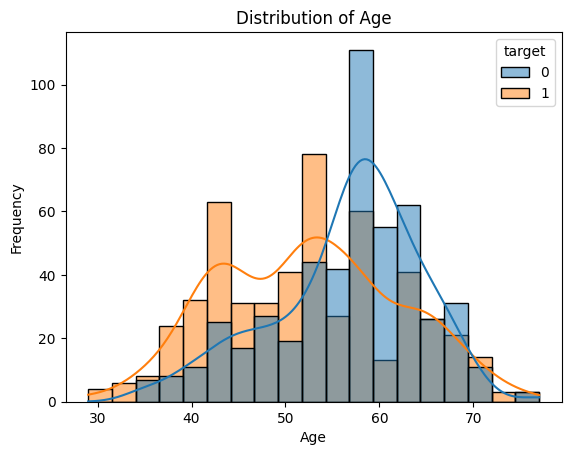

In [90]:
sns.histplot(data=df, x="age", kde=True, hue="target")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Age")
plt.show()


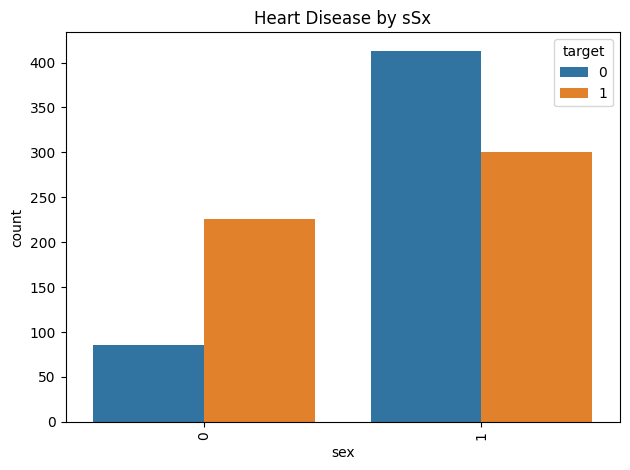

In [91]:
sns.countplot(data=df, x="sex", hue="target")
plt.title("Heart Disease by sSx")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [92]:
# sns.violinplot(data=df, x='category_chol')


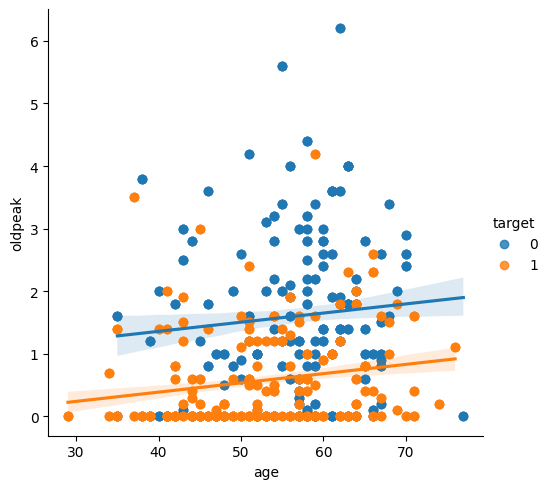

In [93]:
sns.lmplot(data=df, x="age", y="oldpeak", hue="target")


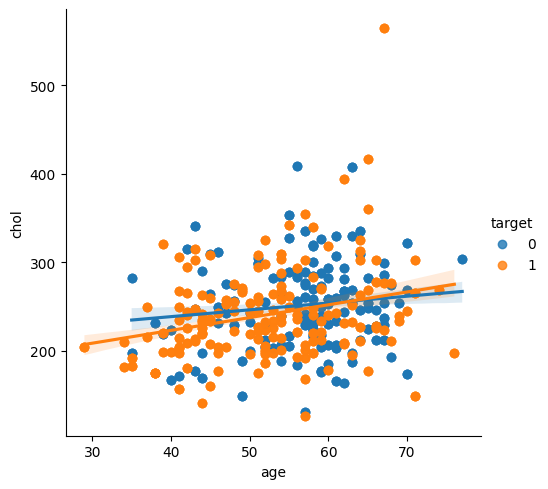

In [94]:
sns.lmplot(data=df, x="age", y="chol", hue="target")


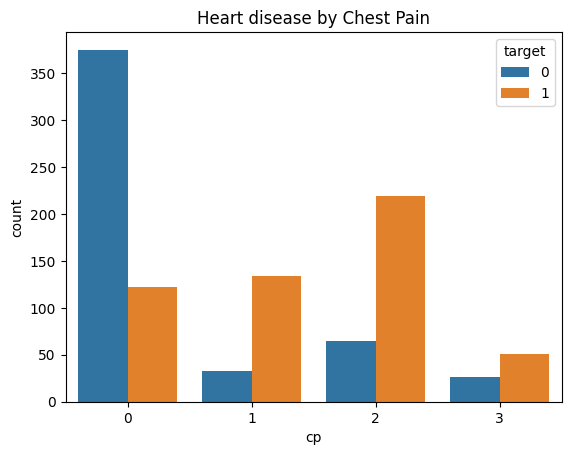

In [95]:
sns.countplot(data=df, x="cp", hue="target")
plt.title("Heart disease by Chest Pain")
plt.show()


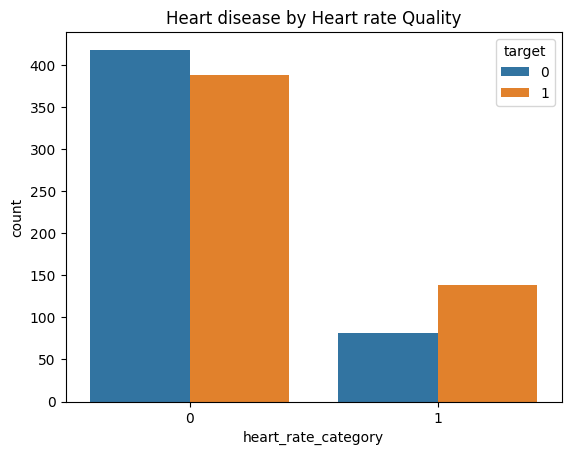

In [96]:
sns.countplot(data=df, x="heart_rate_category", hue="target")
plt.title("Heart disease by Heart rate Quality")
plt.show()


In [97]:
_ = df.groupby("target")["heart_rate_category"].value_counts().unstack()
_


heart_rate_category,0,1
target,,
0,418,81
1,388,138


In [98]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age                  1025 non-null   int64   
 1   sex                  1025 non-null   category
 2   cp                   1025 non-null   category
 3   trestbps             1025 non-null   int64   
 4   chol                 1025 non-null   int64   
 5   fbs                  1025 non-null   category
 6   restecg              1025 non-null   category
 7   thalach              1025 non-null   int64   
 8   exang                1025 non-null   category
 9   oldpeak              1025 non-null   float64 
 10  slope                1025 non-null   category
 11  ca                   1025 non-null   category
 12  thal                 1025 non-null   category
 13  target               1025 non-null   int64   
 14  trestbps_category    1025 non-null   category
 15  chol_category        

# Modeling

## Feature Engineering

In [99]:
df = df[["age", "sex", "cp", "trestbps_category", "chol_category", "fbs", "heart_rate_category", "restecg", "exang", "oldpeak", "slope", "ca", "thal", "target"]]
df.head()

,age,sex,cp,trestbps_category,chol_category,fbs,heart_rate_category,restecg,exang,oldpeak,slope,ca,thal,target
0,52,1,0,1,1,0,0,1,0,1.0,2,2,2,0
1,53,1,0,2,1,1,0,0,1,3.1,0,0,2,0
2,70,1,0,2,0,0,0,1,1,2.6,0,0,2,0
3,61,1,0,2,1,0,1,1,0,0.0,2,1,2,0
4,62,0,0,1,2,1,0,1,0,1.9,1,3,2,0


In [100]:
X = df.drop(columns=['target'])
y = df['target']
print(X.shape)
print(y.shape)

(1025, 13)
(1025,)


## Random Forest

In [101]:
#Import model libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [102]:
K = 10 #Many folds we want to complete in this training
split = 0.75 #split 75/25%

In [103]:
accuracy = []

for fold in range(0, K):

  # Instantiate algorithm
  model = RandomForestRegressor()
  scaler = StandardScaler()

  # Create training and test samples
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=split, random_state=42)

  # Scale X data, we scale the data because it helps the algorithm to converge
  # and helps the algorithm to not be greedy with large values
  scaler.fit(X_train)
  X_train = scaler.transform(X_train)
  X_test = scaler.transform(X_test)

  # Train model
  trained_model = model.fit(X_train, y_train)

  # Generate predictions on test sample
  y_pred = trained_model.predict(X_test)

  # Compute accuracy, using mean absolute error
  mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
  accuracy.append(mae)
  print(f"Fold {fold + 1}: MAE = {mae:.3f}")

print(f"Average MAE: {(sum(accuracy) / len(accuracy)):.2f}")

Fold 1: MAE = 0.063
Fold 2: MAE = 0.061
Fold 3: MAE = 0.063
Fold 4: MAE = 0.063
Fold 5: MAE = 0.062
Fold 6: MAE = 0.063
Fold 7: MAE = 0.064
Fold 8: MAE = 0.064
Fold 9: MAE = 0.063
Fold 10: MAE = 0.065
Average MAE: 0.06


## Naive Bayes

In [104]:
import sklearn.naive_bayes as nb 
import sklearn.metrics as met  
import sklearn.ensemble as ensemble
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [105]:
#Gaussian
gnb = nb.GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [106]:
y_prediction = gnb.predict_proba(X_train)
boosted = ensemble.GradientBoostingClassifier()
boosted.fit(y_prediction, y_train)

boost_test = gnb.predict_proba(X_test)
y_boost_pred = boosted.predict(boost_test)

accuracy = met.accuracy_score(y_test, y_boost_pred)
print("-"*60)
print("This is Classification report of Boost Gaussian Naive Bayes:")
print(classification_report(y_test, y_boost_pred))
print("-"*60)
print('Accuracy =', accuracy)
print("-"*60)

------------------------------------------------------------
This is Classification report of Boost Gaussian Naive Bayes:
              precision    recall  f1-score   support

           0       0.90      0.91      0.90       132
           1       0.90      0.89      0.90       125

    accuracy                           0.90       257
   macro avg       0.90      0.90      0.90       257
weighted avg       0.90      0.90      0.90       257

------------------------------------------------------------
Accuracy = 0.8988326848249028
------------------------------------------------------------


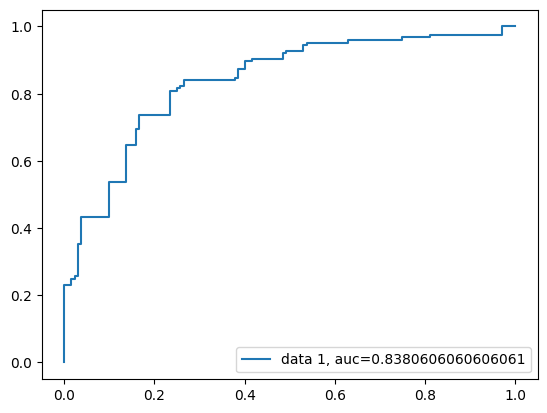

In [107]:
def plot_roc_curve(model, X_test, y_test):
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fp, tp, _ = met.roc_curve(y_test, y_pred_proba) 
    auc = met.roc_auc_score(y_test, y_pred_proba)
    plt.plot(fp, tp, label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.show()

plot_roc_curve(gnb, X_test, y_test)

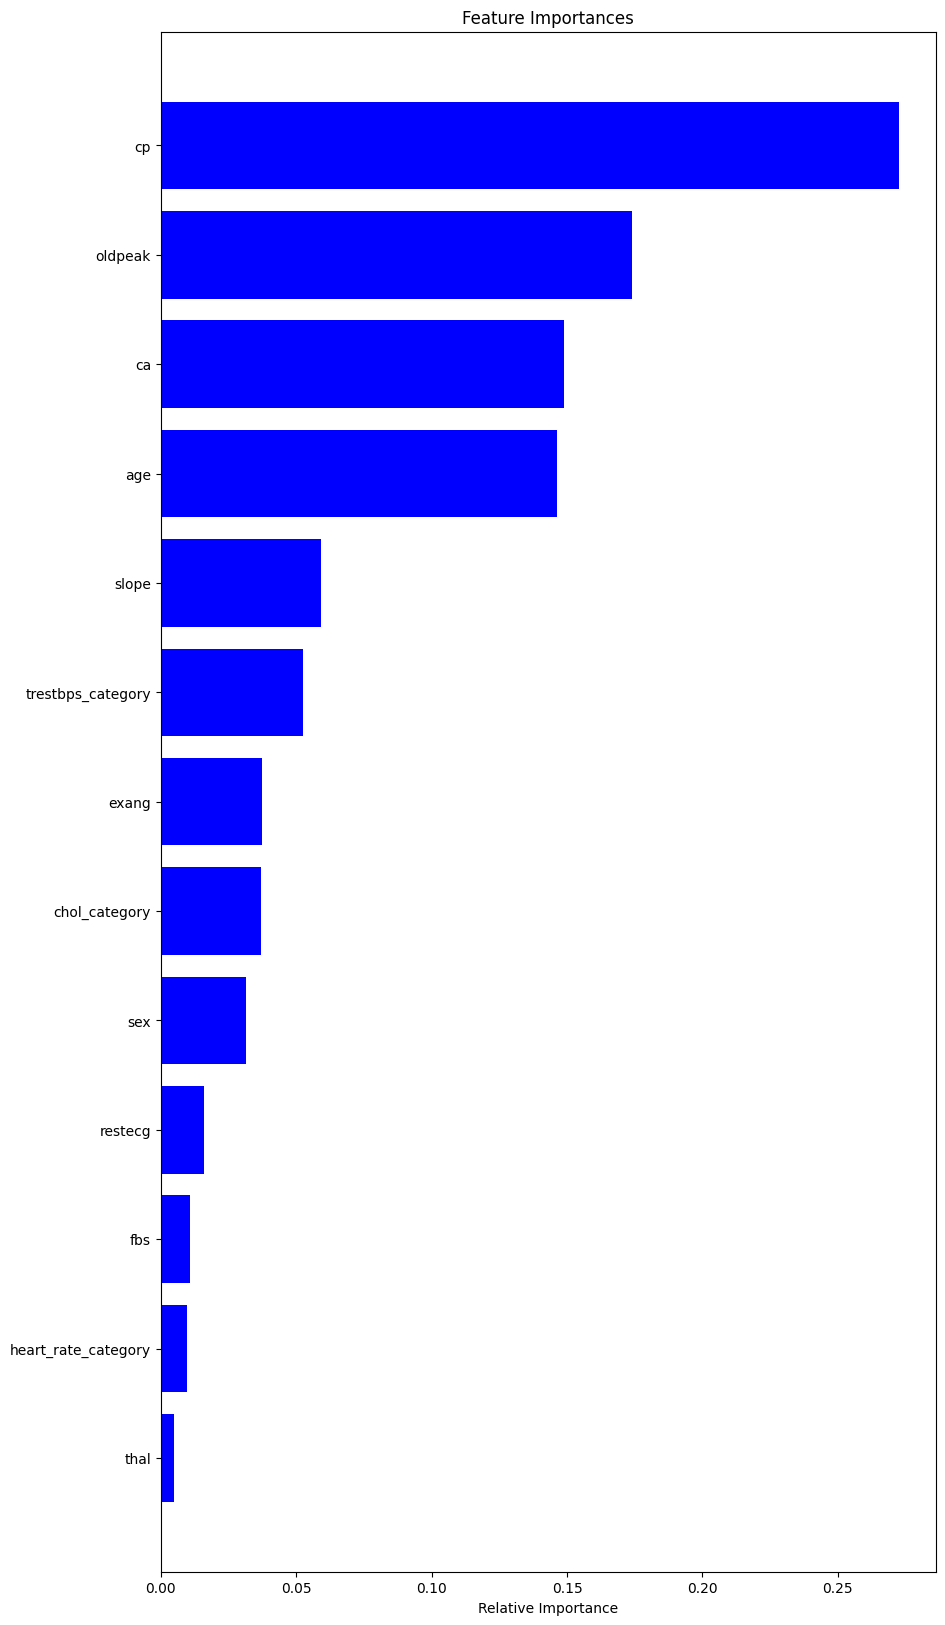

In [108]:
features = [i.split("__")[0] for i in X.columns]
importances = model.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(10, 20))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()